# Market Basket Analysis

In [14]:
# dependencies
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from IPython.display import Image

In [15]:
# load data
df = pd.read_csv('data/ecommerce-data.csv', encoding='unicode-escape')
df.shape

(541909, 8)

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
# data cleaning
# show the empty rows
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [18]:
# remove rows with any empty
data = df.dropna()
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
# remove rows with wrong numerical data
data = data[data.Quantity>0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Several questions:
- Who is loyal customer?
- Whose invoice frequency is the highest?
- Who made the biggest contribution to income?

In [20]:
data['Amount'] = data['Quantity'] * data['UnitPrice']

In [21]:

# Loyal customers
orders = data.groupby(by=['CustomerID', 'Country'],as_index=False)['InvoiceNo'].count()

print('TOP 5 LOYAL CUSTOMERS WITH THE MOST NUMBER OF ORDERS')
orders.sort_values(by='InvoiceNo', ascending=False).head()

TOP 5 LOYAL CUSTOMERS WITH THE MOST NUMBER OF ORDERS


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


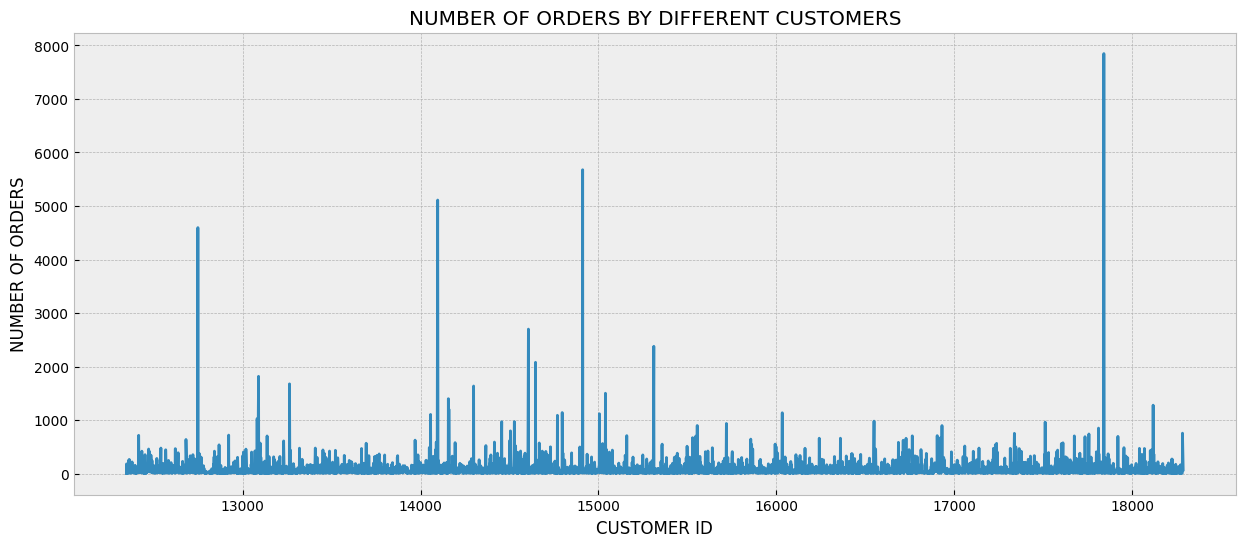

In [22]:
# Drawing

plt.subplots(figsize=(15,6))
plt.style.use('bmh')

plt.plot(orders.CustomerID, orders.InvoiceNo)

plt.xlabel('CUSTOMER ID')
plt.ylabel('NUMBER OF ORDERS')

plt.title('NUMBER OF ORDERS BY DIFFERENT CUSTOMERS')
plt.show()

In [23]:
money_spent = data.groupby(by=['CustomerID','Country'],as_index=False)['Amount'].sum()

print('TOP 5 PROFITABLE CUSTOMERS WITH THE HIGHEST MONEY SPENT')
money_spent.sort_values(by='Amount',ascending=False).head()

TOP 5 PROFITABLE CUSTOMERS WITH THE HIGHEST MONEY SPENT


,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


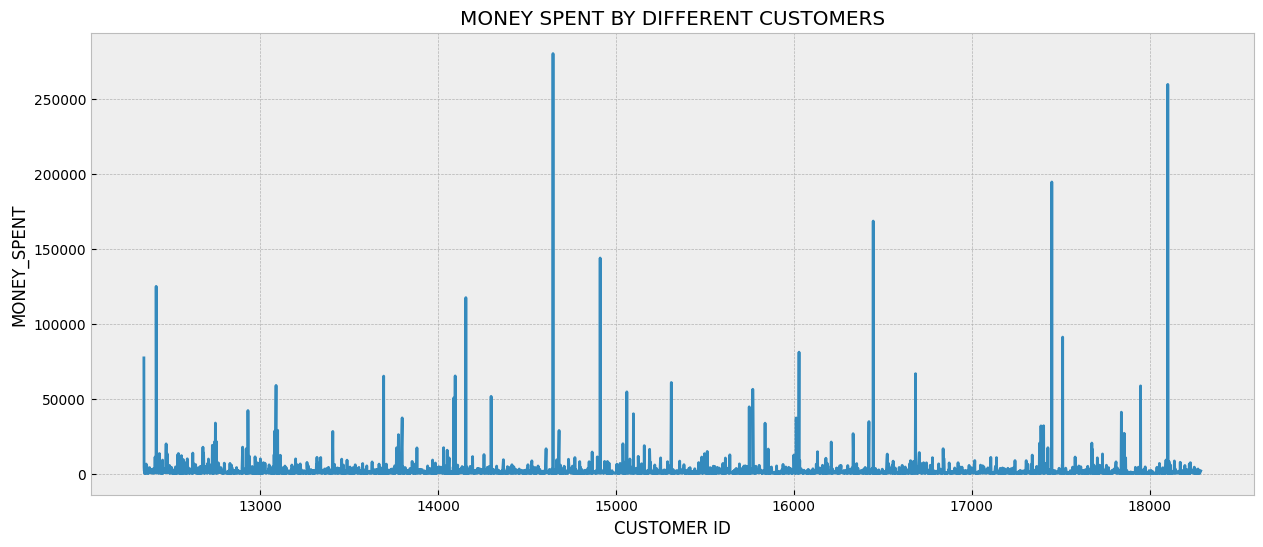

In [24]:
# Drawing

plt.subplots(figsize=(15,6))
plt.style.use('bmh')

plt.plot(money_spent.CustomerID, money_spent.Amount)

plt.xlabel('CUSTOMER ID')
plt.ylabel('MONEY_SPENT')

plt.title('MONEY SPENT BY DIFFERENT CUSTOMERS')
plt.show()